# Code for Figure 2 part (b) and associated statistics reported in the text

Developed by Siobhan Powell, 2021. 

In [1]:
import os
os.chdir('../')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec
import pickle
import datetime

In [3]:
noev_scenario = pd.read_csv('Results/NoEVs_year2030_solar2.5x_wind2.5x_dpdf_20211119.csv')

In [4]:
scens1 = ['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem']
scens2 = ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']

vals = np.zeros((10, 6, 5)) # peak mean weekday total demand
vals2 = np.zeros((10, 6, 5)) # time of day
tables_dfs = {penlevel: pd.DataFrame(np.zeros((6, 5)), 
                                     index=['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak'], 
                                     columns=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork', 'BusinessAsUsual']) for penlevel in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
tables_dfs_timeofpeak = {penlevel: pd.DataFrame(np.zeros((6, 5)), 
                                                index=['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak'], 
                                                columns=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork', 'BusinessAsUsual']) for penlevel in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

for i, scen1 in enumerate(scens1):
    for j, scen2 in enumerate(scens2):
        for k, penlevel in enumerate([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]):
            try:
                demand_df = pd.read_csv('Results/ImpactCurves/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_futuredemand_df_20211119.csv', index_col=0)
            except:
                print('Error for ', penlevel, scen1, scen2)
                
            inds = demand_df[pd.to_datetime(demand_df['datetime']).dt.weekday.isin([0,1,2,3,4])].index
            vals[k, i, j] = demand_df.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0).max()
            vals2[k, i, j] = np.where(demand_df.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0) == demand_df.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0).max())[0][0]
            tables_dfs[penlevel].loc[scen1, scen2] = demand_df.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0).max()
            tables_dfs_timeofpeak[penlevel].loc[scen1, scen2] = np.where(demand_df.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0) == demand_df.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0).max())[0][0]
        
        k = k+1
        penlevel = 1.0
        try: 
            dpdf = pd.read_csv('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_dpdf_20211119.csv')
        except:
            try:
                dpdf = pd.read_csv('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_withstorage_dpdf_20211119.csv')
            except: 
                print('Error for ', penlevel, scen1, scen2)
                    
        vals[k, i, j] = dpdf.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0).max()
        vals2[k, i, j] = np.where(dpdf.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0) == dpdf.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0).max())[0][0]
        tables_dfs[penlevel].loc[scen1, scen2] = dpdf.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0).max()
        tables_dfs_timeofpeak[penlevel].loc[scen1, scen2] = np.where(dpdf.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0) == dpdf.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0).max())[0][0]

        
scen2 = 'BusinessAsUsual'
scen1 =  '_TimersMixed_WPcontrol_minpeak'
i = i+1
j = j+1
for k, penlevel in enumerate([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]):
    try:
        demand_df = pd.read_csv('Results/ImpactCurves/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_futuredemand_df_20211119.csv', index_col=0)
    except:
        print('Error for ', penlevel, scen1, scen2)

    inds = demand_df[pd.to_datetime(demand_df['datetime']).dt.weekday.isin([0,1,2,3,4])].index
    vals[k, i, j] = demand_df.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0).max()
    vals2[k, i, j] = np.where(demand_df.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0) == demand_df.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0).max())[0][0]
    tables_dfs[penlevel].loc[scen1, scen2] = demand_df.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0).max()
    tables_dfs_timeofpeak[penlevel].loc[scen1, scen2] = np.where(demand_df.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0) == demand_df.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0).max())[0][0]

k = k+1
penlevel = 1.0
try: 
    dpdf = pd.read_csv('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_dpdf_20211119.csv')
except:
    try:
        dpdf = pd.read_csv('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_withstorage_dpdf_20211119.csv')
    except: 
        print('Error for ', penlevel, scen1, scen2)
        print('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_withstorage_dpdf_20211119.csv')

vals[k, i, j] = dpdf.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0).max()
tables_dfs[penlevel].loc[scen1, scen2] = dpdf.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0).max()

vals2[k, i, j] = np.where(dpdf.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0) == dpdf.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0).max())[0][0]
tables_dfs_timeofpeak[penlevel].loc[scen1, scen2] = np.where(dpdf.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0) == dpdf.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0).max())[0][0]




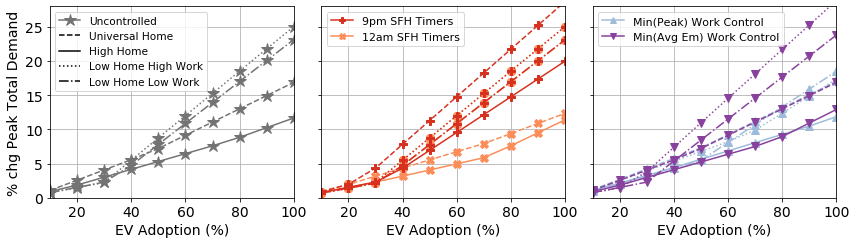

In [16]:
vals_shift = noev_scenario.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0).max()
fig, axes = plt.subplots(1, 3, figsize=(12, 3.5))
colors = ['#d7301f', '#fc8d59', '#737373', '#9ebcda', '#88419d']
lines = ['--', '-', ':', '-.']

markers=['P', 'X', '*', '^', 'v']
ms = [8,8,12,8,8]

idx_control = 2
for idx_access in range(4):
    axes[0].plot(np.arange(10, 105, 10), 100*((vals[:, idx_control, idx_access]-vals_shift)/vals_shift), lines[idx_access], color=colors[idx_control], marker=markers[idx_control],  markersize=ms[idx_control])
axes[0].set_xticks(np.arange(20, 125, 20))
axes[0].set_xticklabels(np.arange(20, 125, 20), fontsize=14)
axes[0].set_xlabel('EV Adoption (%)', fontsize=14)
axes[0].set_yticks(np.arange(0, 27, 5))
axes[0].set_yticklabels(np.arange(0, 27, 5), fontsize=14)
axes[0].set_ylabel('% chg Peak Total Demand', fontsize=14)
axes[0].set_xlim([10, 100])
axes[0].set_ylim([0, 28])
axes[0].set_axisbelow(True)        
axes[0].grid()

for idx_control in [1, 0]:
    for idx_access in range(4):
        axes[1].plot(100*np.arange(0.1, 1.05, 0.1), 100*((vals[:, idx_control, idx_access]-vals_shift)/vals_shift), lines[idx_access], color=colors[idx_control], marker=markers[idx_control],  markersize=ms[idx_control])
axes[1].set_xticks(np.arange(20, 125, 20))
axes[1].set_xticklabels(np.arange(20, 125, 20), fontsize=14)
axes[1].set_yticks(np.arange(0, 28, 5))
axes[1].set_yticklabels([])
axes[1].set_xlabel('EV Adoption (%)', fontsize=14)
axes[1].set_xlim([10, 100])
axes[1].set_ylim([0, 28])
legend_elements=[Line2D([0], [0], marker=markers[0], color=colors[0], label='9pm SFH Timers'), 
                 Line2D([0], [0], marker=markers[1], color=colors[1], markerfacecolor=colors[1], label='12am SFH Timers')]
axes[1].legend(handles=legend_elements, loc='upper left', fontsize=11)
axes[1].set_axisbelow(True)        
axes[1].grid()

for idx_control in [3, 4]:
    for idx_access in range(4):
        axes[2].plot(100*np.arange(0.1, 1.05, 0.1), 100*((vals[:, idx_control, idx_access]-vals_shift)/vals_shift), lines[idx_access], color=colors[idx_control], marker=markers[idx_control], markersize=ms[idx_control])
axes[2].set_xticks(np.arange(20, 125, 20))
axes[2].set_xticklabels(np.arange(20, 125, 20), fontsize=14)
axes[2].set_xlabel('EV Adoption (%)', fontsize=14)
axes[2].set_yticks(np.arange(0, 28, 5))
axes[2].set_yticklabels([])
axes[2].set_xlim([10, 100])
axes[2].set_ylim([0, 28])
legend_elements=[Line2D([0], [0], marker=markers[3], color=colors[3], markerfacecolor=colors[3], label='Min(Peak) Work Control'), 
                 Line2D([0], [0], marker=markers[4], color=colors[4], markerfacecolor=colors[4], label='Min(Avg Em) Work Control')]
axes[2].legend(handles=legend_elements, loc='upper left', fontsize=11)
axes[2].set_axisbelow(True)        
axes[2].grid()

    
scens2 = ['Universal Home', 'High Home', 'Low Home High Work', 'Low Home Low Work']
legend_elements = [Line2D([0], [0], marker='*', markersize=12, color=colors[2], label='Uncontrolled', linestyle='-')]
for j in range(4):
    legend_elements.append(Line2D([0], [0], marker=None, color='k', 
                          label=scens2[j], linestyle=lines[j]))
legend = axes[0].legend(handles=legend_elements, loc='upper left', fontsize=10.5)#, title='Access Scenario')
plt.tight_layout()
plt.savefig('MainPlotting/Plots/fig2b.pdf', bbox_inches='tight')
plt.show()



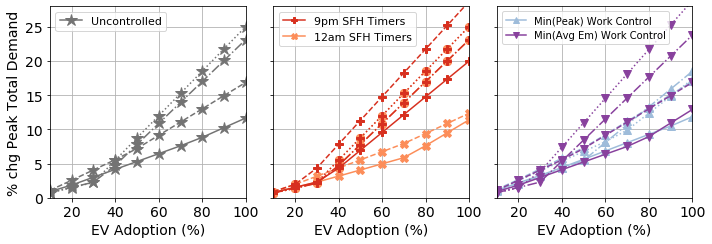

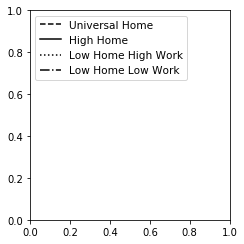

In [13]:
vals_shift = noev_scenario.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0).max()
fig, axes = plt.subplots(1, 3, figsize=(10, 3.5))
colors = ['#d7301f', '#fc8d59', '#737373', '#9ebcda', '#88419d']
lines = ['--', '-', ':', '-.']

markers=['P', 'X', '*', '^', 'v']
ms = [8,8,12,8,8]

idx_control = 2
for idx_access in range(4):
    axes[0].plot(np.arange(10, 105, 10), 100*((vals[:, idx_control, idx_access]-vals_shift)/vals_shift), lines[idx_access], color=colors[idx_control], marker=markers[idx_control],  markersize=ms[idx_control])
axes[0].set_xticks(np.arange(20, 125, 20))
axes[0].set_xticklabels(np.arange(20, 125, 20), fontsize=14)
axes[0].set_xlabel('EV Adoption (%)', fontsize=14)
axes[0].set_yticks(np.arange(0, 27, 5))
axes[0].set_yticklabels(np.arange(0, 27, 5), fontsize=14)
axes[0].set_ylabel('% chg Peak Total Demand', fontsize=14)
axes[0].set_xlim([10, 100])
axes[0].set_ylim([0, 28])
axes[0].set_axisbelow(True)        
axes[0].grid()

for idx_control in [1, 0]:
    for idx_access in range(4):
        axes[1].plot(100*np.arange(0.1, 1.05, 0.1), 100*((vals[:, idx_control, idx_access]-vals_shift)/vals_shift), lines[idx_access], color=colors[idx_control], marker=markers[idx_control],  markersize=ms[idx_control])
# axes[1].set_xticks(np.arange(10, 105, 20))
# axes[1].set_xticklabels(np.arange(10, 105, 20), fontsize=14)
axes[1].set_xticks(np.arange(20, 125, 20))
axes[1].set_xticklabels(np.arange(20, 125, 20), fontsize=14)
axes[1].set_yticks(np.arange(0, 28, 5))
axes[1].set_yticklabels([])
axes[1].set_xlabel('EV Adoption (%)', fontsize=14)
axes[1].set_xlim([10, 100])
axes[1].set_ylim([0, 28])
legend_elements=[Line2D([0], [0], marker=markers[0], color=colors[0], label='9pm SFH Timers'), 
                 Line2D([0], [0], marker=markers[1], color=colors[1], markerfacecolor=colors[1], label='12am SFH Timers')]
axes[1].legend(handles=legend_elements, loc='upper left', fontsize=11)
axes[1].set_axisbelow(True)        
axes[1].grid()

for idx_control in [3, 4]:
    for idx_access in range(4):
        axes[2].plot(100*np.arange(0.1, 1.05, 0.1), 100*((vals[:, idx_control, idx_access]-vals_shift)/vals_shift), lines[idx_access], color=colors[idx_control], marker=markers[idx_control], markersize=ms[idx_control])
axes[2].set_xticks(np.arange(20, 125, 20))
axes[2].set_xticklabels(np.arange(20, 125, 20), fontsize=14)
axes[2].set_xlabel('EV Adoption (%)', fontsize=14)
axes[2].set_yticks(np.arange(0, 28, 5))
axes[2].set_yticklabels([])
axes[2].set_xlim([10, 100])
axes[2].set_ylim([0, 28])
legend_elements=[Line2D([0], [0], marker=markers[3], color=colors[3], markerfacecolor=colors[3], label='Min(Peak) Work Control'), 
                 Line2D([0], [0], marker=markers[4], color=colors[4], markerfacecolor=colors[4], label='Min(Avg Em) Work Control')]
axes[2].legend(handles=legend_elements, loc='upper left', fontsize=10)
axes[2].set_axisbelow(True)        
axes[2].grid()

legend_elements = [Line2D([0], [0], marker='*', markersize=12, color=colors[2], label='Uncontrolled', linestyle='-')]
legend = axes[0].legend(handles=legend_elements, loc='upper left', fontsize=11)#, title='Access Scenario')

plt.tight_layout()
plt.savefig('MainPlotting/Plots/fig2b_option2.pdf', bbox_inches='tight')
plt.show()

fig, axes = plt.subplots(1, 1, figsize=(3.5, 3.5))
scens2 = ['Universal Home', 'High Home', 'Low Home High Work', 'Low Home Low Work']
legend_elements = []
for j in range(4):
    legend_elements.append(Line2D([0], [0], marker=None, color='k', 
                          label=scens2[j], linestyle=lines[j]))
legend = axes.legend(handles=legend_elements, loc='upper left', fontsize=10.5)#, title='Access Scenario')
plt.tight_layout()
plt.savefig('MainPlotting/Plots/fig2b_option2_legend.pdf', bbox_inches='tight')
plt.show()



In [6]:
tables_dfs[1.0].round(2).to_csv('MainPlotting/Tables/peak_total_demand_100p_mw.csv')

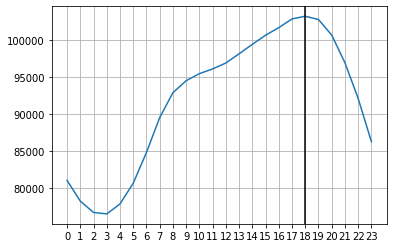

Max value without EVs occurs at 6pm:  103254.83


In [7]:
plt.plot(np.arange(0, 24), noev_scenario.loc[pd.to_datetime(noev_scenario['datetime']).dt.weekday.isin([0,1,2,3,4])]['total_incl_noncombustion'].values.reshape(-1, 24).mean(axis=0))
plt.xticks(np.arange(0, 24))
plt.axvline(18, color='k')
plt.grid()
plt.show()
print('Max value without EVs occurs at 6pm: ', np.round(noev_scenario.loc[pd.to_datetime(noev_scenario['datetime']).dt.weekday.isin([0,1,2,3,4])]['total_incl_noncombustion'].values.reshape(-1, 24).mean(axis=0).max(), 2))

In [8]:
print('Percent change at 20% adoption: ')
(tables_dfs[0.2] - vals_shift) / vals_shift

Percent change at 20% adoption: 


,UniversalHome,HighHome,LowHome_HighWork,LowHome_LowWork,BusinessAsUsual
_Timers9pm_noWPcontrol,0.019614,0.015280,0.013886,0.014192,-1.000000
_Timers12am_noWPcontrol,0.019600,0.015282,0.013872,0.014186,-1.000000
_TimersNone_noWPcontrol,0.025730,0.018647,0.014877,0.015245,-1.000000
_TimersNone_WPcontrol_minpeak,0.026707,0.021787,0.025011,0.020262,-1.000000
_TimersNone_WPcontrol_avgem,0.025571,0.018371,0.014577,0.015064,-1.000000
_TimersMixed_WPcontrol_minpeak,-1.000000,-1.000000,-1.000000,-1.000000,0.018909


In [9]:
print('Ranges from _ to _:')
print(np.round(((tables_dfs[0.2] - vals_shift) / vals_shift)[((tables_dfs[0.2] - vals_shift) / vals_shift) > 0].min().min(), 4))
print(np.round(((tables_dfs[0.2] - vals_shift) / vals_shift)[((tables_dfs[0.2] - vals_shift) / vals_shift) > 0].max().max(), 4))

Ranges from _ to _:
0.0139
0.0267


In [10]:
print('Percent change at 100% adoption: ')
(tables_dfs[1.0] - vals_shift) / vals_shift

Percent change at 100% adoption: 


,UniversalHome,HighHome,LowHome_HighWork,LowHome_LowWork,BusinessAsUsual
_Timers9pm_noWPcontrol,0.287168,0.199936,0.250573,0.231248,-1.00000
_Timers12am_noWPcontrol,0.123667,0.114085,0.250525,0.231001,-1.00000
_TimersNone_noWPcontrol,0.168866,0.116760,0.250485,0.231550,-1.00000
_TimersNone_WPcontrol_minpeak,0.170294,0.118633,0.173642,0.185113,-1.00000
_TimersNone_WPcontrol_avgem,0.168823,0.129221,0.288602,0.238118,-1.00000
_TimersMixed_WPcontrol_minpeak,-1.000000,-1.000000,-1.000000,-1.000000,0.12662


In [11]:
print('Ranges from _ to _:')
print(np.round(((tables_dfs[1.0] - vals_shift) / vals_shift)[((tables_dfs[1.0] - vals_shift) / vals_shift) > 0].min().min(), 4))
print(np.round(((tables_dfs[1.0] - vals_shift) / vals_shift)[((tables_dfs[1.0] - vals_shift) / vals_shift) > 0].max().max(), 4))

Ranges from _ to _:
0.1141
0.2886


# timing: 

In [15]:
print('Hour of peak in mean weekday total demand at 100%:')
tables_dfs_timeofpeak[1.0]

Hour of peak in mean weekday total demand at 100%:


,UniversalHome,HighHome,LowHome_HighWork,LowHome_LowWork,BusinessAsUsual
_Timers9pm_noWPcontrol,21.0,21.0,10.0,10.0,0.0
_Timers12am_noWPcontrol,20.0,10.0,10.0,10.0,0.0
_TimersNone_noWPcontrol,20.0,20.0,10.0,10.0,0.0
_TimersNone_WPcontrol_minpeak,20.0,20.0,10.0,10.0,0.0
_TimersNone_WPcontrol_avgem,20.0,11.0,11.0,11.0,0.0
_TimersMixed_WPcontrol_minpeak,0.0,0.0,0.0,0.0,21.0
